In [382]:
import numpy as np 
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt


In [383]:
# csv
train_df = pd.read_csv("train.csv", encoding='utf-8')
test_df = pd.read_csv("test.csv", encoding='utf-8',
                    names = ['id', '測項', '0', '1', '2', '3', '4', '5', '6', '7', '8'])

# result
train_df

,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,2014/12/20,豐原,THC,1.8,1.8,1.8,1.8,1.8,1.7,1.7,...,1.8,1.8,2,2.1,2,1.9,1.9,1.9,2,2
4316,2014/12/20,豐原,WD_HR,46,13,61,44,55,68,66,...,59,308,327,21,100,109,108,114,108,109
4317,2014/12/20,豐原,WIND_DIREC,36,55,72,327,74,52,59,...,18,311,52,54,121,97,107,118,100,105
4318,2014/12/20,豐原,WIND_SPEED,1.9,2.4,1.9,2.8,2.3,1.9,2.1,...,2.3,2.6,1.3,1,1.5,1,1.7,1.5,2,2


In [384]:
# train: 整理資料
processed_train_df = train_df.copy()
processed_train_df[processed_train_df == 'NR'] = 0 # NR 都改成 0
processed_train_df = processed_train_df.drop(['測站'], axis=1)

# test: 整理資料
processed_test_df = test_df.copy()
processed_test_df[processed_test_df == 'NR'] = 0 # NR 都改成 0

# processed_test_df
processed_train_df

,日期,測項,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,AMB_TEMP,14,14,14,13,12,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,0.47,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,0.13,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,2.2,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,2014/12/20,THC,1.8,1.8,1.8,1.8,1.8,1.7,1.7,1.8,...,1.8,1.8,2,2.1,2,1.9,1.9,1.9,2,2
4316,2014/12/20,WD_HR,46,13,61,44,55,68,66,70,...,59,308,327,21,100,109,108,114,108,109
4317,2014/12/20,WIND_DIREC,36,55,72,327,74,52,59,83,...,18,311,52,54,121,97,107,118,100,105
4318,2014/12/20,WIND_SPEED,1.9,2.4,1.9,2.8,2.3,1.9,2.1,3.7,...,2.3,2.6,1.3,1,1.5,1,1.7,1.5,2,2


In [385]:
processed_train_np = processed_train_df.to_numpy()
print("(pandas) train shape:", processed_train_np.shape)
processed_train_np

(pandas) train shape: (4320, 26)


array([['2014/1/1', 'AMB_TEMP', '14', ..., '15', '15', '15'],
       ['2014/1/1', 'CH4', '1.8', ..., '1.8', '1.8', '1.8'],
       ['2014/1/1', 'CO', '0.51', ..., '0.35', '0.36', '0.32'],
       ...,
       ['2014/12/20', 'WIND_DIREC', '36', ..., '118', '100', '105'],
       ['2014/12/20', 'WIND_SPEED', '1.9', ..., '1.5', '2', '2'],
       ['2014/12/20', 'WS_HR', '0.7', ..., '1.6', '1.8', '2']],
      dtype=object)

In [386]:
# (18, 5760) = (測試項目, 連續小時)

print("12月 * 20天:", 4320 / 18, "(days)")
print("240天 * 24小時:", 240 * 24, "(total hour)")

categoryItem_np = np.zeros((18, 5760))
now_hour = 0
for index in range(processed_train_np.shape[0]):
    for hour in range(24):
        
        temp_1D = int(index % 18 )              # item index
        temp_2D = int(index / 18) * 24 + hour     # hour total
                
        categoryItem_np[temp_1D][temp_2D] = processed_train_np[index][2 + hour]
        
print("after categoryItem_np pandas shape: ", categoryItem_np.shape)
categoryItem_np

12月 * 20天: 240.0 (days)
240天 * 24小時: 5760 (total hour)
after categoryItem_np pandas shape:  (18, 5760)


array([[ 14.  ,  14.  ,  14.  , ...,  13.  ,  13.  ,  13.  ],
       [  1.8 ,   1.8 ,   1.8 , ...,   1.8 ,   1.8 ,   1.8 ],
       [  0.51,   0.41,   0.39, ...,   0.51,   0.57,   0.56],
       ...,
       [ 35.  ,  79.  ,   2.4 , ..., 118.  , 100.  , 105.  ],
       [  1.4 ,   1.8 ,   1.  , ...,   1.5 ,   2.  ,   2.  ],
       [  0.5 ,   0.9 ,   0.6 , ...,   1.6 ,   1.8 ,   2.  ]])

Chatgpt Note:
如果將x和y直接定義為多維數組，其形狀應該分別為(5751, 18, 9)和(5751, 18, 1)，  
而不是np.zeros(5751, (18, 9))和np.zeros(5751, (18, 1))。  
這是因為np.zeros的第二個參數應該是一個表示形狀的元組，而不是多維數組本身。  

In [387]:
# 每10個小時，當作一個時間序列
x = np.zeros((5751, 18, 9))   # (時間段, 測試項目, 測試時間)
y = np.zeros((5751, 18))   # (時間段, 結果時間)

for sHr in range(5751):
    temp_3D = 0
    for eHr in range(sHr, sHr + 10):
        for item in range(18):
            if(eHr - sHr < 9):
                x[sHr][item][temp_3D] = categoryItem_np[item][eHr]
            else:
                y[sHr][item] = categoryItem_np[item][eHr]

        temp_3D += 1
        
        
for test in range(5751):
    if np.array_equal(y[test][0], categoryItem_np[0][test + 9]) == False:
        print("xxxxxxxxx")

for test in range(5751):
    if np.array_equal(x[test][0], categoryItem_np[0][test: test + 9]) == False:
        print("xxxxxxxxx")

x = x.reshape(5751, 18 * 9)
y = y[:, 9]

print("x.shape={}, y.shape={}".format(x.shape, y.shape))       

            

x.shape=(5751, 162), y.shape=(5751,)


In [393]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

print(y_pred)
print(y)

[21.12177899 38.04785418 47.06366994 ... 20.16601355 20.66368272
 25.31803771]
[30. 41. 44. ... 17. 24. 29.]


(5751,)
(5751,)


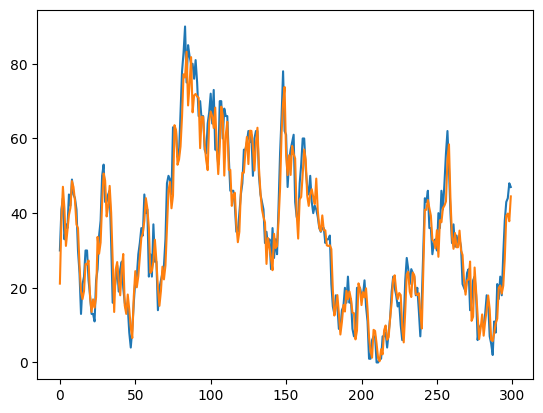

In [407]:
# 驗證
print(y.shape)
print(y_pred.shape)

count = 300

plt_x =  np.arange(0, 5751, 1);
plt.plot(plt_x[:count], y[:count]) 
plt.plot(plt_x[:count], y_pred[:count]) 



# TEST

In [452]:
# 測試集
processed_test_np = processed_test_df.to_numpy()
print("(pandas) test shape:", processed_test_np.shape)

print("test data shape:", processed_test_np.shape[0] / 18, 18, 9)

test_x = np.zeros((240, 18, 9)) # (天，測項，小時)
for index in range(240):
    for item in range(18):
        for hr in range(9):
            # print(index, item, hr, " : ", index * 18 + item, hr)
            test_x[index][item][hr] = processed_test_np[index * 18 + item][hr + 2]
        

print("pre: testX shape", test_x.shape)
test_x = test_x.reshape(240, 18 * 9)
print("after: testX shape", test_x.shape)

test_y_pred = model.predict(test_x)
print("test y pred shape:", test_y_pred.shape)
# print(test_y_pred)


(pandas) test shape: (4320, 11)
test data shape: 240.0 18 9
pre: testX shape (240, 18, 9)
after: testX shape (240, 162)
test y pred shape: (240,)


# CSV

In [479]:
import csv

submission_np = [['id', 'value']]

# 開啟 CSV 檔案
with open('sample_submission.csv', newline='') as csvfile:

  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile)

  # 以迴圈輸出每一列
  count = -1
  for row in rows:
    if count >= 0:
      row[1] = test_y_pred[count]
      submission_np.append([row[0], row[1]])
      
    count += 1
    # print(row)
    
# submission_np
with open('submission_ans.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)

  # 寫入二維表格
  writer.writerows(submission_np)
  

# TEST 驗證

(240,)
(240,)
float32
float32


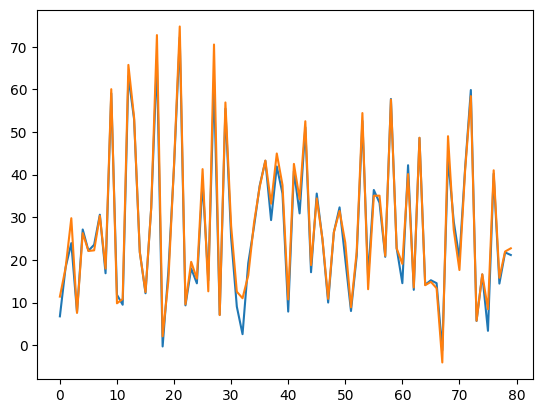

In [520]:
submission_plt_np = np.array(submission_np[1:])[:, 1]
sample_plt_np = np.zeros(submission_plt_np.shape)
# # 開啟 CSV 檔案
with open('submission.csv', newline='') as csvfile:

  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile)

  # 以迴圈輸出每一列
  count = -1
  for row in rows:
    if count >= 0:
      sample_plt_np[count] = row[1]
    count += 1
    
 # 驗證
print(submission_plt_np.shape)
print(sample_plt_np.shape)

submission_plt_np = submission_plt_np.astype('float32')
sample_plt_np = sample_plt_np.astype('float32')

print(sample_plt_np.dtype)
print(submission_plt_np.dtype)

total_size = 80
sub_plt_x =  np.arange(0, total_size, 1);
plt.plot(sub_plt_x[:total_size], submission_plt_np[:total_size]) 
plt.plot(sub_plt_x[:total_size], sample_plt_np[:total_size])  

# ----